# 서포트 벡터 머신

퍼셉트론을 이용하면 빠르게 판별함수 기반 분류모델을 생성할 수 있다.

하지만 이 분류 모델의 단점은 판별 경계선(decision hyperplane)이 유니크하게 존재하지 않는다는 점이다.

다음은 퍼셉트론을 이용해 IRIS 데이터의 꽃받침 길이와 폭을 이용한 퍼셉트론 분류 모형의 예시이다.

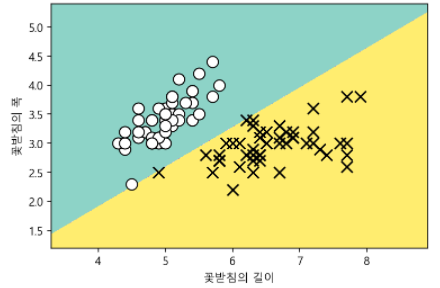

위의 경우를 보면 두 클래스에 대해 완벽하게 ACC가 100%로 분류된 것을 확인할 수 있지만 그 판별 경계선이 X클래스에 대해 너무 가까운 모습을 보인다.

이 경우 새로운 X 데이터가 O쪽에 조금만 가까운 경우 이를 O로 오분류하게 된다.

따라서 이러한 퍼셉트론 모델의 판별경계선 이슈를 보완하기 위해 안정적인 판별경계선 모형을 찾기 위한 제한 조건을 추가한 모형이 바로 서포트 벡터 머신이다.(SVM)

이해를 돕기 위해 아래의 그림을 추가한다.

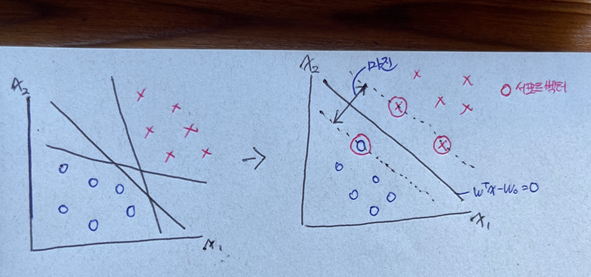

첫번째 그림의 경우 3개의 판별 경계선 모두 100%의 ACC를 가지고 있다.

이 경우가 앞서 언급한 퍼셉트론 모형의 단점을 설명한다.

두번째 그림의 경우는 중앙에 위치한 판별경계선에서 가장 가까운 두 클래스의 서포트벡터로 정의되어 두 클래스를 분류하기 위한 판별 경계선이 두 클래스의 중앙에 위치하는 모습을 보이고 있다.

이 경우가 바로 SVM이다.

# 서포트와 마진

$N$개의 Train data는 다음과 같이 판별함수모형에서 $y$값으로 $+1 or -1$을 가진다.


$$Train = (x_1,y_1),(x_2,y_2),...,(x_N,y_N)$$


$$\begin{split} y = \begin{cases} +1 \\ -1 \end{cases} \end{split}$$

위 Train data 중 $y$값으로 $+1$을 갖는 데이터는 $x_+$, $y$값으로 $-1$을 갖는 데이터는 $y_-$로 표현한다.

또한 판별함수 모형에서 판별함수는 직선이기에 다음과 같은 직선의 방정식으로 표현된다.

$$f(x) = w^Tx - w_0$$

즉, 판별함수 모형은 부호함수를 이용하기에 다음과 같이 $y$값에 따라 판별함수 값을 표현할 수 있다.

- $y$값이 $+1$인 데이터 $x_+$

$$f(x_+) = w^Tx_+ - w_0 > 0$$

- $y$값이 $-1$인 데이터 $x_-$

$$f(x_-) = w^Tx_- - w_0  < 0$$

위 수식에서 $y$값이 $+1$인 데이터 중 판별함수값이 가장 작은 데이터를 $x^+$, $y$값이 $-1$인 데이터 중 판별함수 값이 가장 큰 데이터를 $x^-$라 한다.

이 데이터들은 판별 경계선에서 가장 가까운(most front) 데이터들이며 이를 앞서 언급한 서포트벡터라 한다.(support vector)

서포트 벡터 역시 부호조건을 만족한다.

$$f(x^+) = w^Tx^+ - w_0 > 0$$


$$f(x^-) = w^Tx^- - w_0 < 0$$

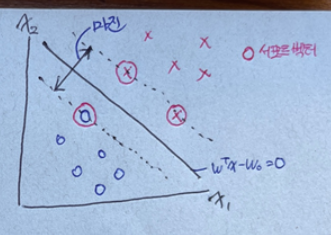

위 그림을 옆에서 바라본다면 다음과 같다.

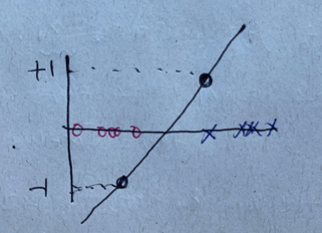

이처럼 판별함수 경계선의 기울기가 어떻게 되더라도 분류에는 지장이 없기 때문에 위처럼 양쪽의 서포트벡터의 높이를 $+1과 -1$로 지정한다.

이렇게 되면 모든 $x_+, x_-$ 데이터는 판별함수의 값이 절댓값이 1보다 커지게 되어 다음과 같은 부등식이 성립하게 된다.

$$w^Tx_+ - w_o \geq 1$$

$$w^Tx_- - w_o \leq -1$$

판별경계선과 두 서포트 사이의 거리는 다음과 같이 계산된다.

$$\dfrac{w^T x^{+} - w_0}{\| w \|} = \dfrac{1}{\| w \|}$$

$$-\dfrac{w^T x^{-} - w_0}{\| w \|} = \dfrac{1}{\| w \|}$$

위의 두 거리의 합이 바로 마진(margin)이 되며 이 마진값이 크면 클수록 안정적인 경계선으로 볼 수 있다.

$$\dfrac{w^T x^{+} - w_0}{\| w \|}  -\dfrac{w^T x^{-} - w_0}{\| w \|} = \dfrac{2}{\| w \|}$$

즉, 마진값을 가장 크게 하는 방법은 분모에 해당하는 $||w||$를 최소로 만드는 것이며 루트로 인한 계산에 불편함을 덜기 위해 $||w||^2$을 최소화 하는 목적함수를 사용한다.

$$L = \dfrac{1}{2}||w||^2 = \dfrac{1}{2}w^Tw$$

이제 위 식을 통해 $\dfrac{1}{2}w^Tw$값을 가장 작게 가지는 경계선을 찾으면 된다.

그런데 모든 경계선에 대해 위 값을 찾는 것이 아니라 분류를 제대로 하고 있는 경계선에 대해 위 값을 계산한다.


분류를 제대로 하고 있는 경계선을 찾는 방법은 다음과 같다.

$$y_i \cdot f(x_i) = y_i \cdot( w^Tx_i - w_o) \geq 1 \;\;\; ( i = 1, \ldots, N )$$

$y$값은 $+1, -1$만 가능하므로 제대로 분류되는 경계선의 경우 $\geq 1$가 성립한다.

즉, $N$개의 부등식 조건을 성립하는 경계선 중 $\dfrac{1}{2}w^Tw$값이 가장 작은 경계선을 찾으면 된다.

이를 라그랑주 승수법을 이용해 목적함수를 다음과 같이 고칠 수 있다.

$$L = \dfrac{1}{2} w^T w - \sum_{i=1}^N a_i \{ y_i \cdot ( w^Tx_i - w_o) - 1 \}$$

$(\lambda = a)$

즉, 이 최적화 문제를 푸는 것으로 $w, w_0, a$를 구하여 판별함수를 구한다.

이처럼 부등식 제한조건을 가진 최적화 문제는 KKT(Karush–Kuhn–Tucker) 문제로 해결할 수 있다.

KKT 조건은 다음과 같다.

1. $w$에 대해 모든 기울기는 0 $\dfrac{\partial L}{\partial x}=0$

2. 라그랑주 승수에 대해 라그랑주 승수가 0 혹은 라그랑주 승수로 미분한 값이 0 $\dfrac{\partial h}{\partial \lambda} = 0$

3. 라그랑주 승수값은 양수 $\lambda \geq 0$

여기서 한가지 중요한 점은 Train data 중 부등식 여부에 관계 없이 답이 같은 경우에는 라그랑주 승수 $a=0$이 된다. 이 경우는 판별함수의 값 $w^Tx_i - w_0$가 $-1$보다 작거나 $1$보다 큰 경우이다.

$$y_i(w^Tx_i - w_o) - 1  > 0$$

즉, 서포트 벡터가 아닌 모든 데이터들에 대해서 이 조건이 만족하므로 라그랑주 승수가 0이 된다.

$$a_i = 0 \;\; \text{if} \;\; x_i \notin \{ x^{+}, x^{-} \}$$

그런데 여기서 문제점은 모든 데이터에 대해 $\lambda$값이 0인지 아닌지를 미분하여 확인해야 한다.
즉, $+, -$인 경우를 고려하면 결국 최적화 문제를 해결하는 횟수는 모든 데이터의 갯수의 두배이다.

따라서 이러한 문제를 해결하기 위해 듀얼형식 이라는 것을 사용한다.

# 듀얼형식

라그랑주 승수법을 이용해 위의 최적화 문제를 해결하려면 $a, w$값을 모두 계산하여야 했다.

하지만 듀얼 형식을 이용하면 다음과 같이 $a$만을 찾는 문제로 바뀌게 된다.

먼저 최적화 조건은 $L$을 $w, w_0$로 미분한 값이 0이 되어야 한다.

이를 이용해 식을 정리하면 다음과 같은 식이 도출된다.

$$w = \sum_{i=1}^N a_i y_i x_i$$

$$0 = \sum_{i=1}^N a_i y_i$$

이 두 식을 $L$에 대입하면 다음과 같다.

$$L = \sum_{i=1}^N a_i - \dfrac{1}{2}\sum_{i=1}^N\sum_{j=1}^N a_i a_j y_i y_j x_i^T x_j$$

여기서 $a$는 다음의 조건을 만족한다.

$$\sum_{i=1}^N a_i y_i = 0$$

$$a_i \geq 0 \;\;\;  ( i = 1, \ldots, N )$$

즉, 듀얼형식을 통해 $a$만을 구하면 되는 문제로 매우 간단해졌다.

추가적으로 목적함수 $L$의 식을 자세히 보면 결국 $QP$문제가 됨을 확인할 수 있다.

따라서 최종적으로 $L$을 최소화하는 $a$는 다음과 같다.

$$f(x) = w^T x - w_0 = \sum_{i=1}^N a_i y_i x_i^T x - w_0$$

$$w_0 = w^T x^{+} - 1$$

여기서 추가적으로 라그랑주 승수값이 0인 데이터는 $w$계산에 아무런 영향을 미치지 않으므로 다음과 같은 식으로 정리된다.

$$f(x) = a^+ x^T x^+ - a^- x^T x^- - w_0$$

위 식을 보면 결국 두 서포트 벡터와의 코사인 유사도를 측정해 값이 큰 쪽으로 판별하게 된다는 것을 알 수 있다.

# sklearn SVC

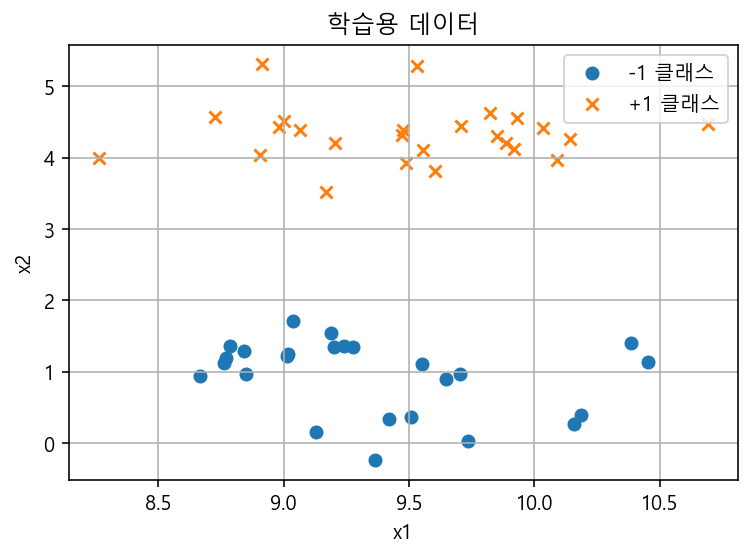

In [10]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("학습용 데이터")
plt.grid()
plt.show()

SVC 클래스가 제공하는 파라미터는 다음과 같다.

- kernel : 커널을 선택
- C : slack variable weight

SVC 클래스가 제공하는 속성은 다음과 같다.

- n_support_ : 각 클래스의 서포트의 갯수
- support_ : 각 클래스의 서포트의 인덱스
- support_vectors_ : 각 클래스의 서포트의 $x$값. $x^+, x^-$
- coef_ : $w$벡터
- intercept_ : -$w_0$
- dual_coef_ : 각 원소가 $a_i * y_i$로 이루어진 벡터

In [11]:
from sklearn.svm import SVC

model = SVC(kernel = "linear", C = 1e10).fit(X, y)

In [22]:
def SVC_INFO(model):
    info_titles = ['n_support_',
                  'support_',
                  'support_vectors_',
                  'coef_',
                  'intercept_']
    
    info_list = [model.n_support_, model.support_, model.support_vectors_, 
                 model.coef_, model.intercept_]
    
    for idx, info in enumerate(info_list):
        print(info_titles[idx] ,' :', info)
        
SVC_INFO(model)

n_support_  : [1 1]
support_  : [42  1]
support_vectors_  : [[9.03715314 1.71813465]
 [9.17124955 3.52485535]]
coef_  : [[0.08171082 1.10091404]]
intercept_  : [-3.62995208]


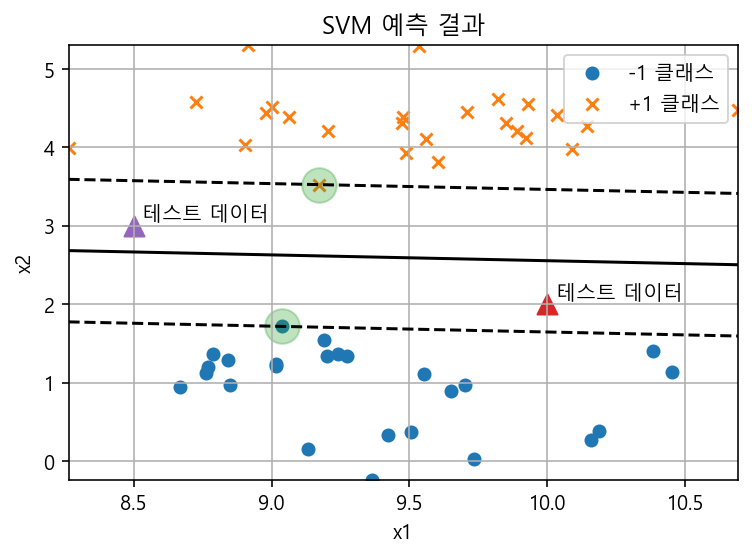

In [31]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new1 = [10, 2]
plt.scatter(x_new1[0], x_new1[1], marker='^', s=100)
plt.text(x_new1[0] + 0.03, x_new1[1] + 0.08, "테스트 데이터")

x_new2 = [8.5, 3]
plt.scatter(x_new2[0], x_new2[1], marker='^', s=100)
plt.text(x_new2[0] + 0.03, x_new2[1] + 0.08, "테스트 데이터")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과")
plt.grid()
plt.show()

In [36]:
# 해안선 아래에 있으므로 음수
# -1보다는 커야함

x_new1 = [10, 2]
model.decision_function([x_new1])

array([-0.61101582])

In [35]:
# 해안선 위에 있으므로 양수
# 서포트가 +1이므로 +1보다는 작은 양수

model.decision_function([x_new2])

array([0.367332])

$w^Tx - w_0$

In [28]:
model.coef_.dot(x_new) + model.intercept_

array([-0.61101582])

In [29]:
# dual_coef_ = a_i * y_i
model.dual_coef_

array([[-0.60934379,  0.60934379]])

In [30]:
model.dual_coef_[0][0] * model.support_vectors_[0].dot(x_new) + \
    model.dual_coef_[0][1] * model.support_vectors_[1].dot(x_new) + \
    model.intercept_

array([-0.61101582])

# SVC IRIS 예제

## 데이터 로드

In [122]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:100, :2] # 꽃받침 길이, 폭만 사용
y = iris.target[:100] # Setosa, Versicolor만 사용

In [126]:
# 0, 1 클래스를 -1, 1로 변경

y = np.where(y==0, -1, 1)

## 모델 생성

In [127]:
# 모델 생성

model = SVC(kernel="linear", C=1e10).fit(X, y)
SVC_INFO(model)

n_support_  : [2 2]
support_  : [36 41 57 84]
support_vectors_  : [[5.5 3.5]
 [4.5 2.3]
 [4.9 2.4]
 [5.4 3. ]]
coef_  : [[ 6.31777572 -5.26481134]]
intercept_  : [-17.32124155]


## 판별 경계선 시각화

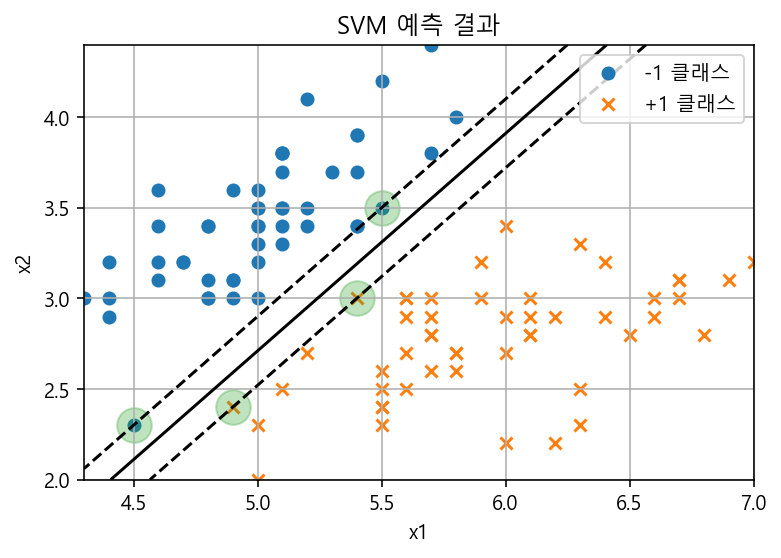

In [134]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과")
plt.grid()
plt.show()

## 성능 측정

In [116]:
# 모델 성능 측정

from sklearn.metrics import classification_report
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



# 슬랙변수

슬랙변수란 선형분리가 불가능한 경우에 사용한다.

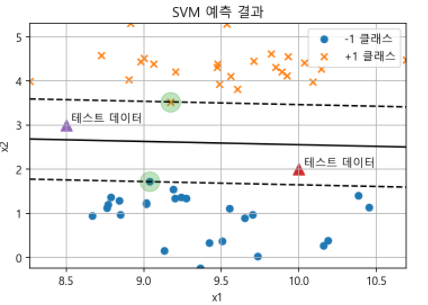

위의 예시에서 두 테스트 데이터가 각각 가까운 쪽의 클래스가 아닌 반대의 클래스라고 가정해보자.
(빨간색 테스트 데이터의 클래스 = +1, 보라색 테스트 데이터의 클래스 = -1)

그렇다면 판별경계선을 기준으로 $f = 0$, +1 클래스 쪽은 $f=1$, -1 클래스 쪽은 $f=-1$이지만 이 규칙을 깨게 된다.

즉, 반대쪽 클래스로 파고들어가는 현상이다. 

여기서 반대쪽 클래스로 얼마나 많이 파고들었냐를 나타내는 변수를 $\xi$라고 한다.

이 문제는 판별경계선의 마진을 넓히는 과정에서 발생할 수 있는데 최종적으로 슬랙변수 $\xi$를 이용해 마진이 작아지는 한이 있더라도 슬랙변수의 합이 너무 커지지 않도록 제한하는 역할을 한다.

$$L = \dfrac{1}{2} ||w||^2 - \sum_{i=1}^N a_i (y_i \cdot ( w^Tx_i - w_o) - 1 + \xi_i ) - \sum_{i=1}^N \mu_i \xi_i  + C \sum_{i=1}^N \xi_i$$

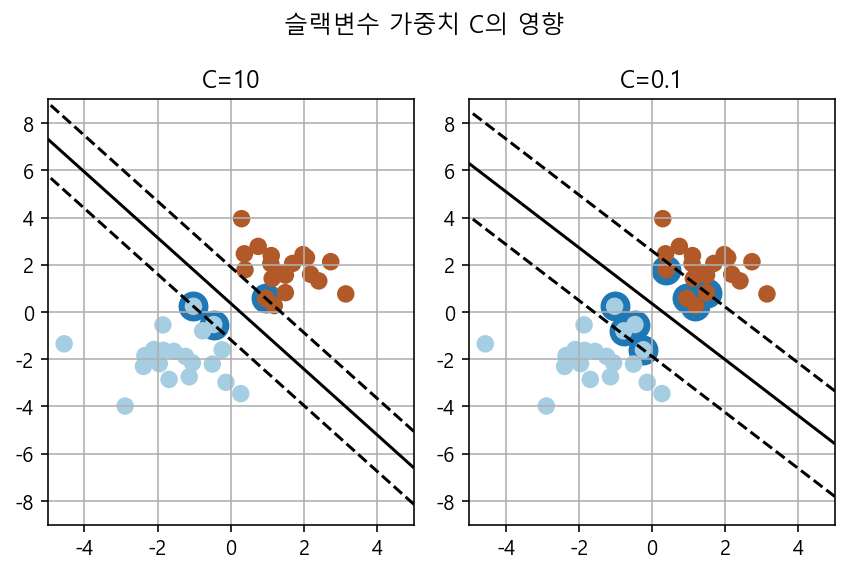

In [137]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

plotnum = 1
for name, penalty in (('C=10', 10), ('C=0.1', 0.1)):
    clf = SVC(kernel='linear', C=penalty).fit(X, Y)
    xx = np.linspace(-5, 5)

    x_jin = -5
    x_jax = 5
    y_jin = -9
    y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]

    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.subplot(1, 2, plotnum)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)
    plt.grid()
    plotnum += 1

plt.suptitle("슬랙변수 가중치 C의 영향")
plt.tight_layout()
plt.show()

슬랙변수 가중치 $C$를 크게 준 경우와 작게 준 경우의 마진을 비교해보면 그 차이를 확인할 수 있으며 그 마진으로 인한 서포트 벡터를 넘어서는 데이터들을 확인할 수 있다.

슬랙변수를 1e10, 0.1로 준 두 경우에 대해 IRIS 데이터를 이용한 분류문제를 해결하면 다음과 같은 현상이 발견된다.

In [138]:
from sklearn.datasets import load_iris
iris = load_iris()
X2 = iris.data[50:, 2:]
y2 = iris.target[50:] - 1

from sklearn.svm import SVC
model1 = SVC(kernel="linear", C=1e10).fit(X2, y2)

from sklearn.metrics import classification_report
print(classification_report(y2, model1.predict(X2)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        50
           1       1.00      0.90      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



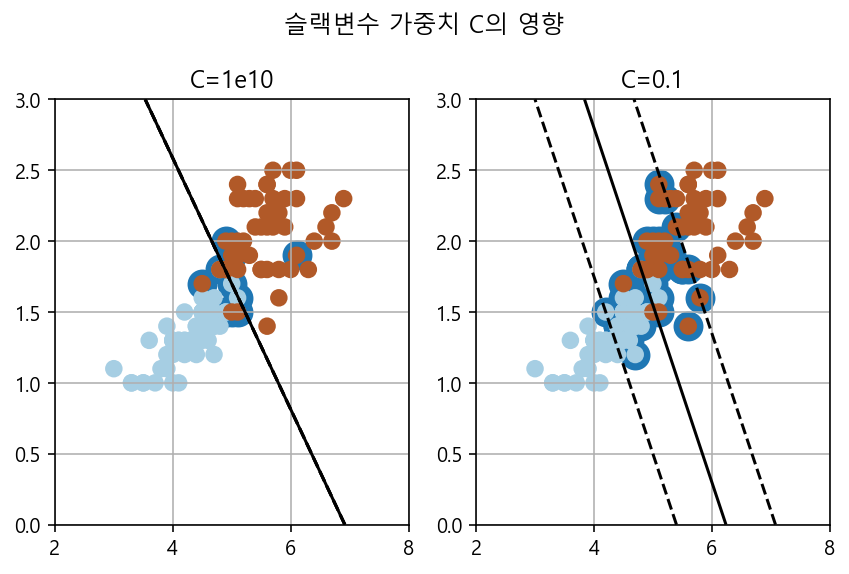

In [140]:
plotnum = 1
for name, penalty in (('C=1e10', 1e10), ('C=0.1', 0.1)):
    clf = SVC(kernel='linear', C=penalty).fit(X2, y2)
    xx = np.linspace(2, 8)

    x_jin = 2
    x_jax = 8
    y_jin = 0
    y_jax = 3
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]

    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.subplot(1, 2, plotnum)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=60, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)
    plt.grid()
    plotnum += 1

plt.suptitle("슬랙변수 가중치 C의 영향")
plt.tight_layout()
plt.show()

reference : 이 글은 데이터사이언스 스쿨을 공부한 내용입니다.